In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string

In [0]:
data = pd.read_csv("/content/drive/My Drive/niki/train (3) (1) (3) (2).csv")

In [111]:
print(data.shape)

(5693, 6)


In [112]:
sub_data = data[['Review Text','Star Rating']] 
print(sub_data.shape)
sub_data.replace('', np.nan, inplace=True)
print(sub_data.shape)
sub_data.dropna( inplace=True)
print(sub_data.shape)

(5693, 2)
(5693, 2)
(5692, 2)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [113]:
sub_data.duplicated(subset={'Review Text','Star Rating'},).value_counts()

False    4659
True     1033
dtype: int64

# Removing Duplicates

In [114]:
 sub_data.drop_duplicates(subset={'Review Text','Star Rating'},keep="first",inplace=True)
 print(sub_data.shape)

(4659, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Number of samples for each rating

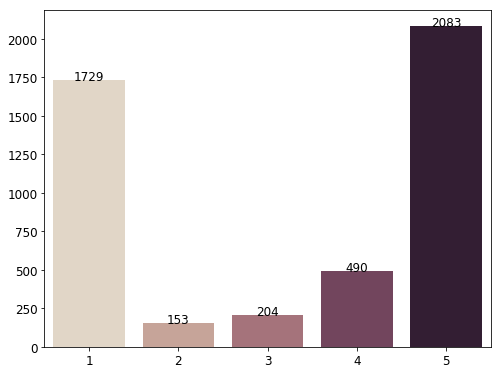

In [115]:
num_rating = {}
for i in range(1,6):
  num_rating[i] = 0
for i in sub_data['Star Rating']:
  num_rating[i]+=1
fig = sns.barplot(x = list(num_rating.keys()), y = list(num_rating.values()), palette="ch:.25")
for i, j in enumerate(num_rating):
  fig.text(i,num_rating[j],num_rating[j], color='black', ha="center")

plt.show()

# Average length of review for each rating

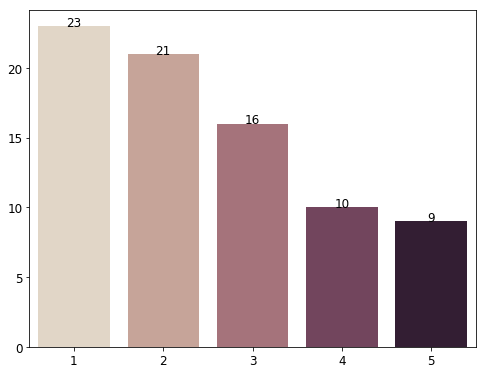

In [116]:
review_length = {}
for i in range(1,6):
  review_length[i] = 0
i = 0
for sent in sub_data['Review Text'].values:
  length = len(sent.translate(str.maketrans('','',string.punctuation)).lower().split())
  review_length[sub_data["Star Rating"].values[i]]+=length
  i+=1
  
for i in range(1,6):
  review_length[i] = int(review_length[i]/num_rating[i])

fig = sns.barplot(x = list(review_length.keys()), y = list(review_length.values()), palette="ch:.25")
for i, j in enumerate(review_length):
  fig.text(i,review_length[j],review_length[j], color='black', ha="center")

plt.show()




# some worst reviews

In [117]:

worst_reviews = sub_data.loc[sub_data['Star Rating'] == 1, ['Review Text']].sample(5).values
for review in worst_reviews:
    print(review[0])

Don't download this app this is totally fake..they did't give recharge or paytm cash..they are big fraud..don't waste your time
transaction failed but money got debited and no refund and resolution is provided by team. no one responds on the issue.
Cheater fake . Dont have any cc number not replied via mail. Worthless
Worst app as unable to use my given cashback when you try to use it then transaction fails otherwise it works fine. Niki if you donot let us use our credits then why u give it.
bad servies???


# Some best reviews

In [129]:

best_reviews = sub_data.loc[sub_data['Star Rating'] == 5, ['Review Text']].sample(5).values
for review in best_reviews:
    print(review[0])

Simply Amazing app. Loved each and every feature of it.
Good App Love U
Its very helpful
Did my first bill payment from niki today..all fine Good app
First of all thumbs up to the team for bringing something so innovative out in the market. The app is fast, efficient and most importantly, Very Useful. I booked cabs from this app and the whole process till final booking was easy and quick. I hope the developers come out with upgrades to help us do more with Niki. Surely waiting for it.


# length of the word vs number of words having that length

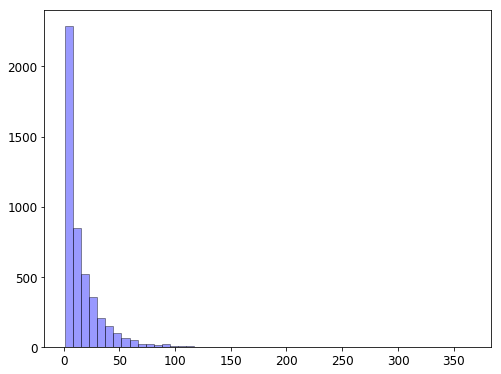

In [119]:
word_count = []

for review_txt in sub_data['Review Text']:
  length = len(review_txt.translate(str.maketrans('','',string.punctuation)).lower().split())
  word_count.append(length)
  
sns.distplot(word_count,hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.show()

In [120]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [0]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
snow = SnowballStemmer('english')
stop = stopwords.words('english')



all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
i = 0
for sent in sub_data['Review Text'].values:
  tmp = sent.translate(str.maketrans('','',string.punctuation)).lower().split()
  for w in tmp:   
    if(w not in stop):
      s=(snow.stem(w.lower())).encode('utf8')
      if (sub_data["Star Rating"].values)[i] == 5 or (sub_data["Star Rating"].values)[i] == 4: 
          all_positive_words.append(s) #list of all words used to describe positive reviews
      if(sub_data["Star Rating"].values)[i] == 1 or (sub_data["Star Rating"].values)[i] == 2:
          all_negative_words.append(s) #list of all words used to describe negative reviews reviews
    else:
      #print("Eliminated as it is a stopword")
      continue
  i+=1

In [128]:
from collections import Counter
print("No. of positive words:",len(all_positive_words))
print("No. of negative words:",len(all_negative_words))
positive = Counter(all_positive_words)
print("\nMost Common postive words",positive.most_common(10))
negative = Counter(all_negative_words)
print("\nMost Common negative words",negative.most_common(10))

No. of positive words: 15867
No. of negative words: 26362

Most Common postive words [(b'app', 1289), (b'good', 597), (b'nice', 379), (b'use', 362), (b'recharg', 279), (b'offer', 277), (b'bill', 252), (b'payment', 242), (b'best', 226), (b'niki', 222)]

Most Common negative words [(b'app', 1230), (b'recharg', 640), (b'use', 361), (b'dont', 326), (b'bill', 324), (b'payment', 309), (b'niki', 308), (b'worst', 302), (b'money', 277), (b'custom', 268)]


# 15 most common words in 4 & 5 star rating reviews

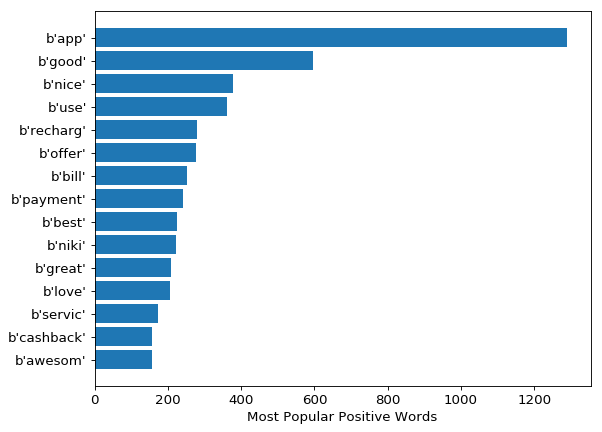

In [124]:

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pos_words = positive.most_common(15)
pos_words.sort(key=lambda x: x[1], reverse=False) 
words=[]
times=[]
for w,t in pos_words:
    words.append(w)
    times.append(t)
plt.barh(range(len(words)),times)
plt.yticks(range(len(words)),words) 
plt.xlabel('Most Popular Positive Words')
plt.show()

# 15 most common words in 1 & 2 star rating reviews

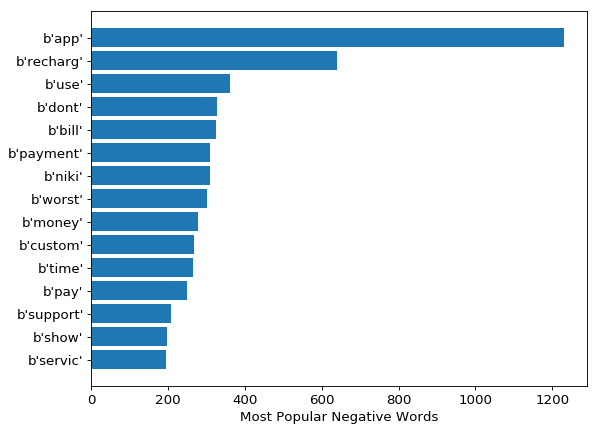

In [125]:
neg_words = negative.most_common(15)
neg_words.sort(key=lambda x: x[1], reverse=False) 
words=[]
times=[]
for w,t in neg_words:
    words.append(w)
    times.append(t)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(range(len(words)),times)
plt.yticks(range(len(words)),words) 
plt.xlabel('Most Popular Negative Words')
plt.show()

# Wordcloud for 4 & 5 star rating

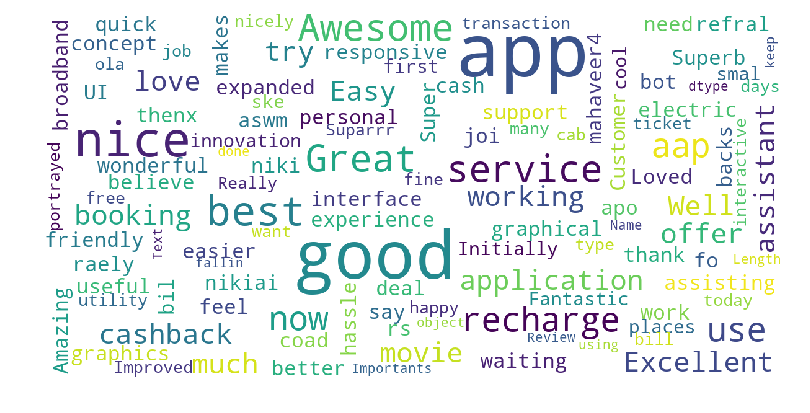

In [126]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

plt.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['font.size']=12                #10 
plt.rcParams['savefig.dpi']=100             #72 
plt.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(sub_data.loc[(sub_data['Star Rating'] == 5) | (sub_data['Star Rating'] == 4)]['Review Text'])


# Wordcloud for 1 & 2 star rating

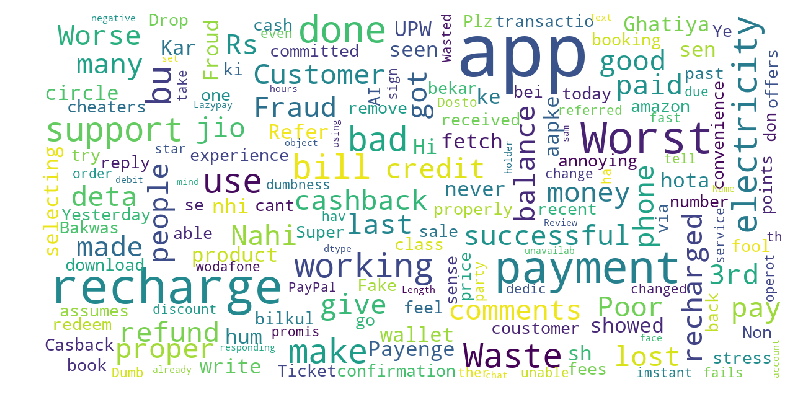

In [127]:
plt.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['font.size']=12                #10 
plt.rcParams['savefig.dpi']=100             #72 
plt.rcParams['figure.subplot.bottom']=.1 

show_wordcloud(sub_data.loc[(sub_data['Star Rating'] == 1) | (sub_data['Star Rating'] == 2)]['Review Text'])